<a href="https://colab.research.google.com/github/omanale/machine_larning/blob/main/life_expectancy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

## reading and getting information from data

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/amirhosseinmirzaie/countries-life-expectancy'

In [ ]:
od.download(dataset_url)

Skipping, found downloaded files in ".\countries-life-expectancy" (use force=True to force download)


In [ ]:
import os

In [ ]:
data_dir = "./countries-life-expectancy"

In [ ]:
os.listdir(data_dir)

['life_expectancy.csv']

In [ ]:
os.listdir(data_dir)

['life_expectancy.csv']

In [ ]:
train_csv = data_dir + '/life_expectancy.csv'

In [ ]:
import pandas as pd

In [ ]:
raw_df=pd.read_csv(train_csv)

In [ ]:
raw_df.head(5)

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


In [ ]:
raw_df.shape

(2848, 18)

In [ ]:
raw_df.duplicated().sum()

0

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

In [ ]:
raw_df.describe()

,Year,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
count,2848.000000,2.204000e+03,2306.000000,2848.000000,2829.000000,2829.000000,2848.000000,2848.000000,2848.000000,2627.000000,2406.000000,2816.000000,2816.000000,2660.000000,2688.000000,2848.000000
mean,2007.500000,1.283457e+07,81.076756,2083.082163,82.682220,82.451396,1.756461,28.359902,39.500000,5.935577,7664.398813,38.503374,4.847230,4.638932,12.060156,69.347402
std,4.610582,6.196094e+07,25.019068,10249.107207,23.434954,23.693936,5.148935,117.188032,159.800866,2.504439,14466.241793,19.955485,4.443695,4.064721,3.320160,9.528332
min,2000.000000,3.400000e+01,1.000000,0.000000,3.000000,2.000000,0.100000,0.000000,0.000000,0.370000,1.681350,1.000000,0.100000,0.010000,0.000000,36.300000
25%,2003.750000,1.967585e+05,77.000000,0.000000,78.000000,78.000000,0.100000,0.000000,0.000000,4.240000,477.541713,19.500000,1.600000,0.930000,10.200000,63.500000
50%,2007.500000,1.391756e+06,92.000000,16.000000,93.000000,93.000000,0.100000,3.000000,4.000000,5.760000,1841.086830,43.900000,3.300000,3.785000,12.400000,72.200000
75%,2011.250000,7.438947e+06,97.000000,336.750000,97.000000,97.000000,0.700000,20.000000,25.000000,7.530000,6265.658907,56.200000,7.125000,7.810000,14.300000,75.800000
max,2015.000000,1.293859e+09,99.000000,212183.000000,99.000000,99.000000,50.600000,1800.000000,2500.000000,17.600000,119172.741800,77.600000,27.700000,17.870000,20.700000,89.000000


In [ ]:
raw_df.describe(include = "object")

,Country,Status
count,2848,2848
unique,178,2
top,Afghanistan,Developing
freq,16,2352


## cleaning of data

In [ ]:
raw_df.isna().sum()

Country                   0
Year                      0
Status                    0
Population              644
Hepatitis B             542
Measles                   0
Polio                    19
Diphtheria               19
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       221
GDP                     442
BMI                      32
thinness  1-19 years     32
Alcohol                 188
Schooling               160
Life expectancy           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes('object').columns.tolist()

In [ ]:
numeric_cols

['Year',
 'Population',
 'Hepatitis B',
 'Measles',
 'Polio',
 'Diphtheria',
 'HIV/AIDS',
 'infant deaths',
 'under-five deaths',
 'Total expenditure',
 'GDP',
 'BMI',
 'thinness  1-19 years',
 'Alcohol',
 'Schooling',
 'Life expectancy']

In [ ]:
categorical_cols

['Country', 'Status']

In [ ]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [ ]:
raw_df[numeric_cols] = imputer.transform(raw_df[numeric_cols])

In [ ]:
raw_df[numeric_cols].head(50)

,Year,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,2015.0,33736494.0,65.000000,1154.0,6.0,65.0,0.1,62.0,83.0,8.160000,584.259210,19.1,17.2,0.010000,10.1,65.0
1,2014.0,327582.0,62.000000,492.0,58.0,62.0,0.1,64.0,86.0,8.180000,612.696514,18.6,17.5,0.010000,10.0,59.9
2,2013.0,31731688.0,64.000000,430.0,62.0,64.0,0.1,66.0,89.0,8.130000,631.744976,18.1,17.7,0.010000,9.9,59.9
3,2012.0,3696958.0,67.000000,2787.0,67.0,67.0,0.1,69.0,93.0,8.520000,669.959000,17.6,17.9,0.010000,9.8,59.5
4,2011.0,2978599.0,68.000000,3013.0,68.0,68.0,0.1,71.0,97.0,7.870000,63.537231,17.2,18.2,0.010000,9.5,59.2
5,2010.0,2883167.0,66.000000,1989.0,66.0,66.0,0.1,74.0,102.0,9.200000,553.328940,16.7,18.4,0.010000,9.2,58.8
6,2009.0,284331.0,63.000000,2861.0,63.0,63.0,0.1,77.0,106.0,9.420000,445.893298,16.2,18.6,0.010000,8.9,58.6
7,2008.0,2729431.0,64.000000,1599.0,64.0,64.0,0.1,80.0,110.0,8.330000,373.361116,15.7,18.8,0.030000,8.7,58.1
8,2007.0,26616792.0,63.000000,1141.0,63.0,63.0,0.1,82.0,113.0,6.730000,369.835796,15.2,19.0,0.020000,8.4,57.5
9,2006.0,2589345.0,64.000000,1990.0,58.0,58.0,0.1,84.0,116.0,7.430000,272.563770,14.7,19.2,0.030000,8.1,57.3


In [ ]:
raw_df.isna().sum()

Country                 0
Year                    0
Status                  0
Population              0
Hepatitis B             0
Measles                 0
Polio                   0
Diphtheria              0
HIV/AIDS                0
infant deaths           0
under-five deaths       0
Total expenditure       0
GDP                     0
BMI                     0
thinness  1-19 years    0
Alcohol                 0
Schooling               0
Life expectancy         0
dtype: int64

## data vsualization

In [ ]:
fig = px.pie(raw_df, names='Status')

In [ ]:
fig

In [ ]:
go.Figure(
    data=[go.Histogram(x=raw_df["Life expectancy"], xbins={"start": 36.0, "end": 90.0, "size": 1.0})],
    layout=go.Layout(title="Histogram of Life expectancy", yaxis={"title": "Count"}, bargap=0.05),
)

In [ ]:
 raw_df['Status'].replace({'Developing' : 0, 'Developed' : 1,}, inplace=True)

In [ ]:
raw_df.drop(['Country'], axis=1, inplace=True)

In [ ]:
#train_df =raw_df[numeric_cols]

raw_df_corr = raw_df.corr()

In [ ]:
raw_df_corr

,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
Year,1.000000e+00,9.261633e-15,0.014941,0.086101,-0.083160,0.094297,0.128227,-0.137193,-0.031105,-0.036478,0.078453,0.094081,0.106048,-0.039098,-0.044714,0.202957,0.169144
Status,9.261633e-15,1.000000e+00,-0.039269,0.091944,-0.070272,0.216535,0.213482,-0.147762,-0.105108,-0.108160,0.296801,0.448637,0.308236,-0.370209,0.576962,0.488124,0.483330
Population,1.494095e-02,-3.926859e-02,1.000000,-0.111072,0.276094,-0.029801,-0.021611,-0.028679,0.560413,0.545203,-0.065690,-0.025420,-0.061766,0.236788,-0.028398,-0.026595,-0.017603
Hepatitis B,8.610088e-02,9.194366e-02,-0.111072,1.000000,-0.097171,0.405061,0.501157,-0.104605,-0.178255,-0.183739,0.059638,0.060731,0.139434,-0.111690,0.066520,0.158324,0.204348
Measles,-8.316023e-02,-7.027200e-02,0.276094,-0.097171,1.000000,-0.169092,-0.174605,0.045853,0.493982,0.512826,-0.102828,-0.062485,-0.174733,0.258073,-0.050377,-0.129975,-0.198178
Polio,9.429706e-02,2.165350e-01,-0.029801,0.405061,-0.169092,1.000000,0.672972,-0.159411,-0.172119,-0.188233,0.135440,0.192384,0.285454,-0.224705,0.205739,0.377328,0.461290
Diphtheria,1.282273e-01,2.134815e-01,-0.021611,0.501157,-0.174605,0.672972,1.000000,-0.162605,-0.173293,-0.191159,0.149035,0.181221,0.282239,-0.223666,0.208102,0.378301,0.473636
HIV/AIDS,-1.371929e-01,-1.477618e-01,-0.028679,-0.104605,0.045853,-0.159411,-0.162605,1.000000,0.027153,0.039157,-0.000318,-0.135291,-0.244326,0.200424,-0.048878,-0.218795,-0.559105
infant deaths,-3.110454e-02,-1.051077e-01,0.560413,-0.178255,0.493982,-0.172119,-0.173293,0.027153,1.000000,0.996948,-0.120953,-0.101029,-0.214632,0.471057,-0.108807,-0.184112,-0.201055
under-five deaths,-3.647839e-02,-1.081597e-01,0.545203,-0.183739,0.512826,-0.188233,-0.191159,0.039157,0.996948,1.000000,-0.122666,-0.104517,-0.224889,0.470517,-0.104747,-0.197999,-0.224903


In [ ]:
fig = px.imshow(raw_df_corr,
                labels=dict(x="Features", y="Features"),
                x=raw_df_corr.columns,
                y=raw_df_corr.columns,
                color_continuous_scale="Blues",
                color_continuous_midpoint=0)

fig.update_layout(
    title="Correlation Heatmap",
    width=800,
    height=500,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed')

fig.show()

## Features

In [ ]:
X = raw_df.drop('Life expectancy', axis=1)
y = raw_df['Life expectancy']

## modeling

# linear regression

In [ ]:
model = LinearRegression()

##These lists contain different numbers that we will use later to test and experiment with our model

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]


##These lines set up some variables to keep track of the best results we find during our tests
best_test_size = None
best_random_state = None
best_r2_score = -float('inf')


## The "std_scaler" helps us make the numbers we're working with look similar to each other.
# The "poly_transformer" helps us change the numbers to a special format called "polynomial features,"
std_scaler = StandardScaler()
poly_transformer = PolynomialFeatures(degree=2)

#These lines start a process where we will try different combinations of test sizes and random states
for test_size in test_sizes:
    for random_state in random_states:

        #we split our data into two parts: the training set and the testing set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        #These lines use the "std_scaler" tool to change the training and testing data so that they look similar to each othe
        X_train = std_scaler.fit_transform(X_train)
        X_test = std_scaler.transform(X_test)

        # we use the "poly_transformer" tool to transform the training data into a special format that helps our model understand the patterns better
        poly_transformer.fit(X_train)
        poly_features = poly_transformer.transform(X_train)

        #This line teaches our model the patterns in the training data
        model.fit(poly_features, y_train)

        #These lines use the patterns our model learned to make predictions on the testing data
        valid_poly_features = poly_transformer.transform(X_test)
        y_pred = model.predict(valid_poly_features)

        #his line calculates a score called R2 score, which tells us how well our model's predictions match the actual results.
        r2 = r2_score(y_test, y_pred)

        #we compare the R2 score we just calculated with the best score we have found so far.
        #If the new score is higher, it means our model did better this time
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 42
Best R2 score: 0.8959587527286198


## KNN regressor

In [ ]:
model = KNeighborsRegressor()

##These lists contain different numbers that we will use later to test and experiment with our model
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]



##These lines set up some variables to keep track of the best results we find during our tests
best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

#These lines start a process where we will try different combinations of test sizes and random states
for test_size in test_sizes:
    for random_state in random_states:

        #we split our data into two parts: the training set and the testing set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        #These lines use the "std_scaler" tool to change the training and testing data so that they look similar to each othe
        X_train = std_scaler.fit_transform(X_train)
        X_test = std_scaler.transform(X_test)

        # we use the "poly_transformer" tool to transform the training data into a special format that helps our model unders
        poly_transformer.fit(X_train)
        poly_features = poly_transformer.transform(X_train)

        #This line teaches our model the patterns in the training data
        model.fit(poly_features, y_train)

        #These lines use the patterns our model learned to make predictions on the testing data
        valid_poly_features = poly_transformer.transform(X_test)
        y_pred = model.predict(valid_poly_features)

        #his line calculates a score called R2 score, which tells us how well our model's predictions match the actual result
        r2 = r2_score(y_test, y_pred)

        #we compare the R2 score we just calculated with the best score we have found so far.
        #If the new score is higher, it means our model did better this time
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 42
Best R2 score: 0.9203855969469152


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

KNNmodel = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

poly_transformer.fit(X_train)
poly_features = poly_transformer.transform(X_train)

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(poly_features, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
valid_poly_features = poly_transformer.transform(X_test)
y_pred = model.predict(valid_poly_features)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9247950792822135
Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
R2 score on test set: 0.9329490565252867


In [ ]:
KNNmodel = KNeighborsRegressor(**best_params)
KNNmodel.fit(poly_features, y_train)

KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')

In [ ]:
y_pred = KNNmodel.predict(valid_poly_features)
r2_score(y_test, y_pred)

0.9522208488155744

## Decision Tree regressor

In [ ]:

model = DecisionTreeRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        X_train = std_scaler.fit_transform(X_train)
        X_test = std_scaler.transform(X_test)
        poly_transformer.fit(X_train)
        poly_features = poly_transformer.transform(X_train)
        model.fit(poly_features, y_train)
        valid_poly_features = poly_transformer.transform(X_test)
        y_pred = model.predict(valid_poly_features)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 42
Best R2 score: 0.9353461094151343


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

DTRmodel = DecisionTreeRegressor()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

poly_transformer.fit(X_train)
poly_features = poly_transformer.transform(X_train)

grid_search = GridSearchCV(estimator=DTRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(poly_features, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
valid_poly_features = poly_transformer.transform(X_test)
y_pred = model.predict(valid_poly_features)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.8974581544278845
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 15}
R2 score on test set: 0.904908572109334


In [ ]:
DTRmodel = DecisionTreeRegressor(**best_params)
DTRmodel.fit(poly_features, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=6, min_samples_split=15)

In [ ]:
y_pred = DTRmodel.predict(valid_poly_features)
r2_score(y_test, y_pred)

0.9018902735012506

In [ ]:
X_final = std_scaler.fit_transform(X)
poly_transformer.fit(X_final)
final_poly_features = poly_transformer.transform(X_final)
y_final = KNNmodel.predict(final_poly_features)

In [ ]:
# data visualization
comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_final})

fig = px.scatter(comparison_df, x='Actual', y='Predicted', color='Actual')
fig.update_layout(
    title='Comparison of Actual vs. Predicted',
    xaxis_title='Actual',
    yaxis_title='Predicted'
)
fig.show()

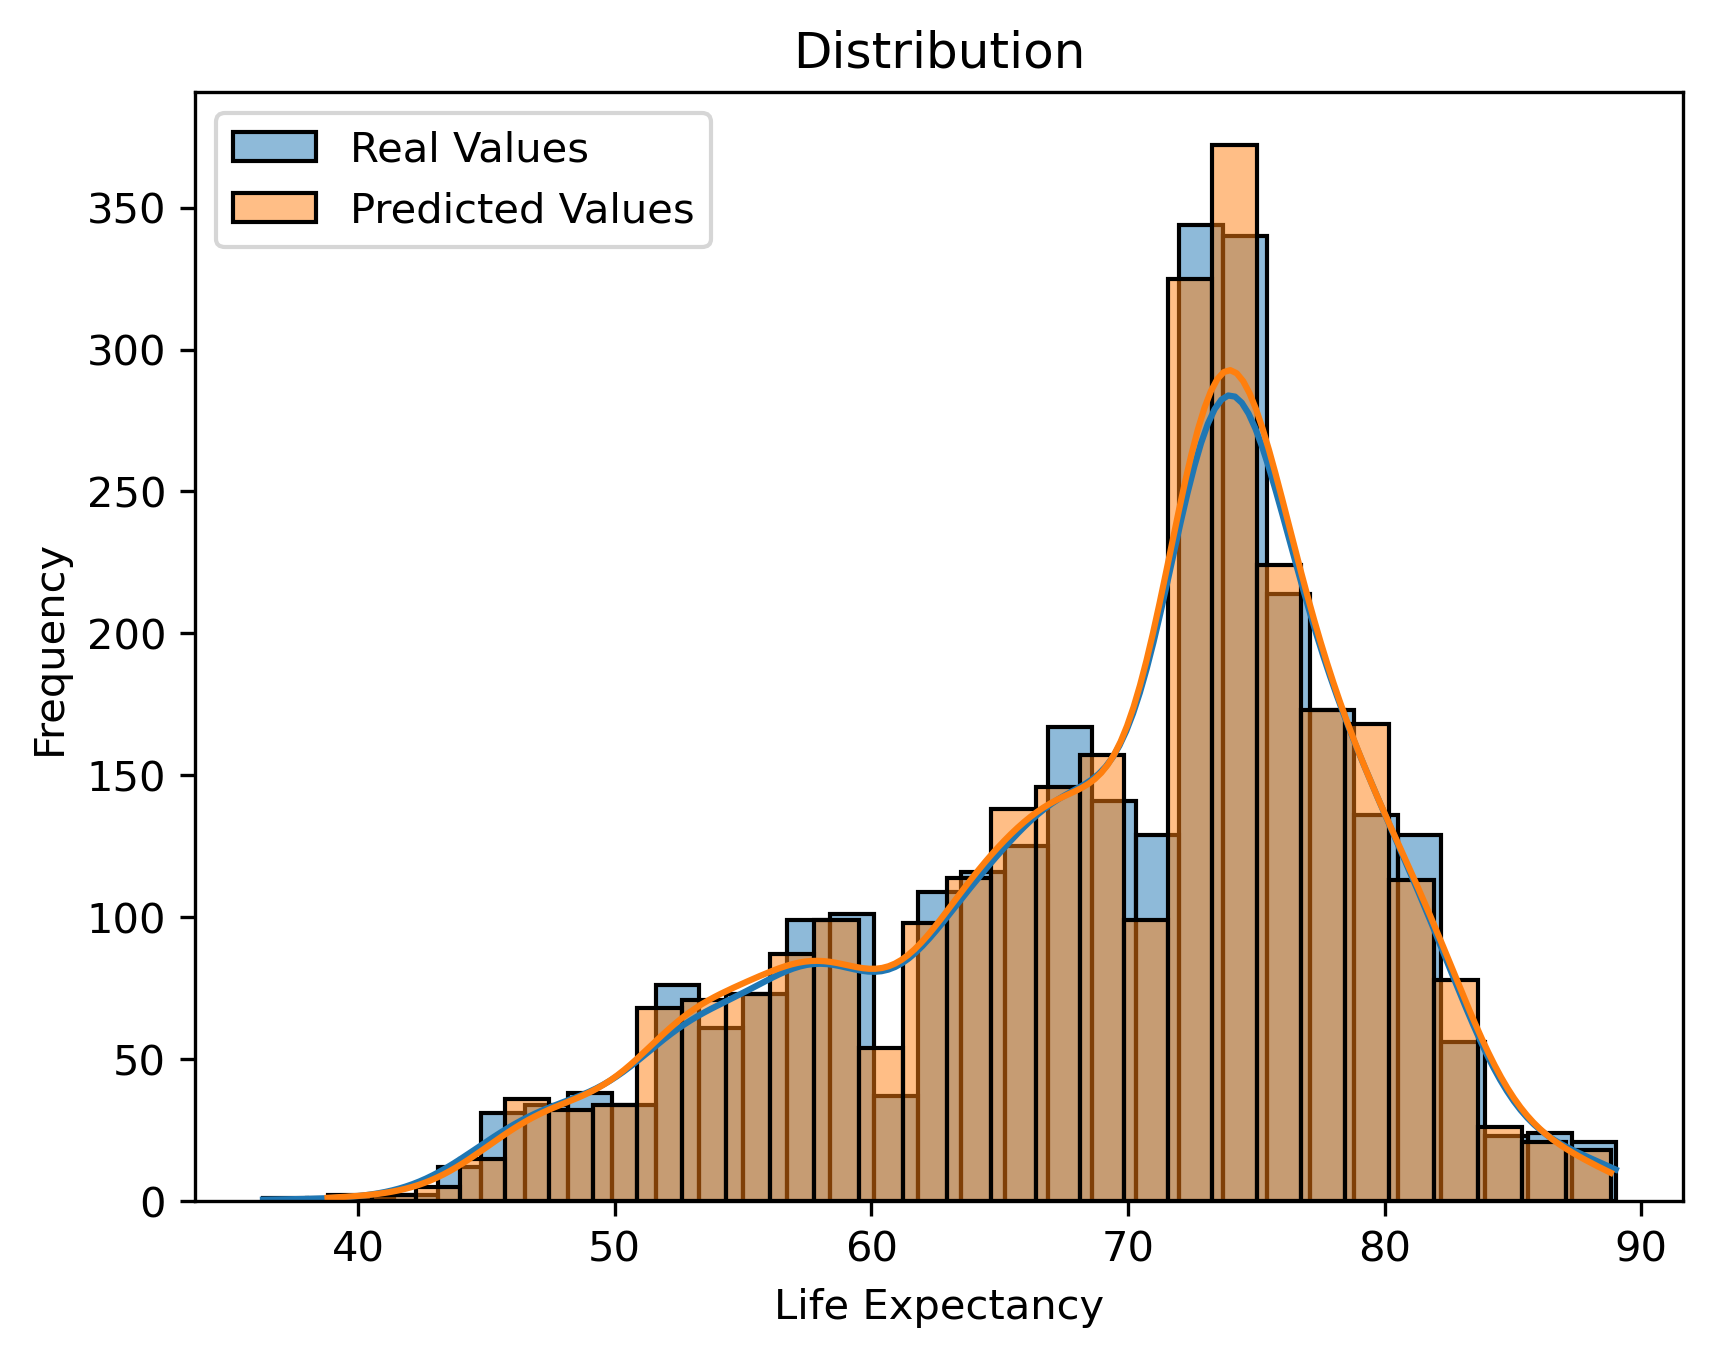

In [ ]:
plt.figure(dpi=300)
sns.histplot(raw_df['Life expectancy'], kde=True, label='Real Values')
sns.histplot(y_final, kde=True, label='Predicted Values')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.legend()
plt.show();

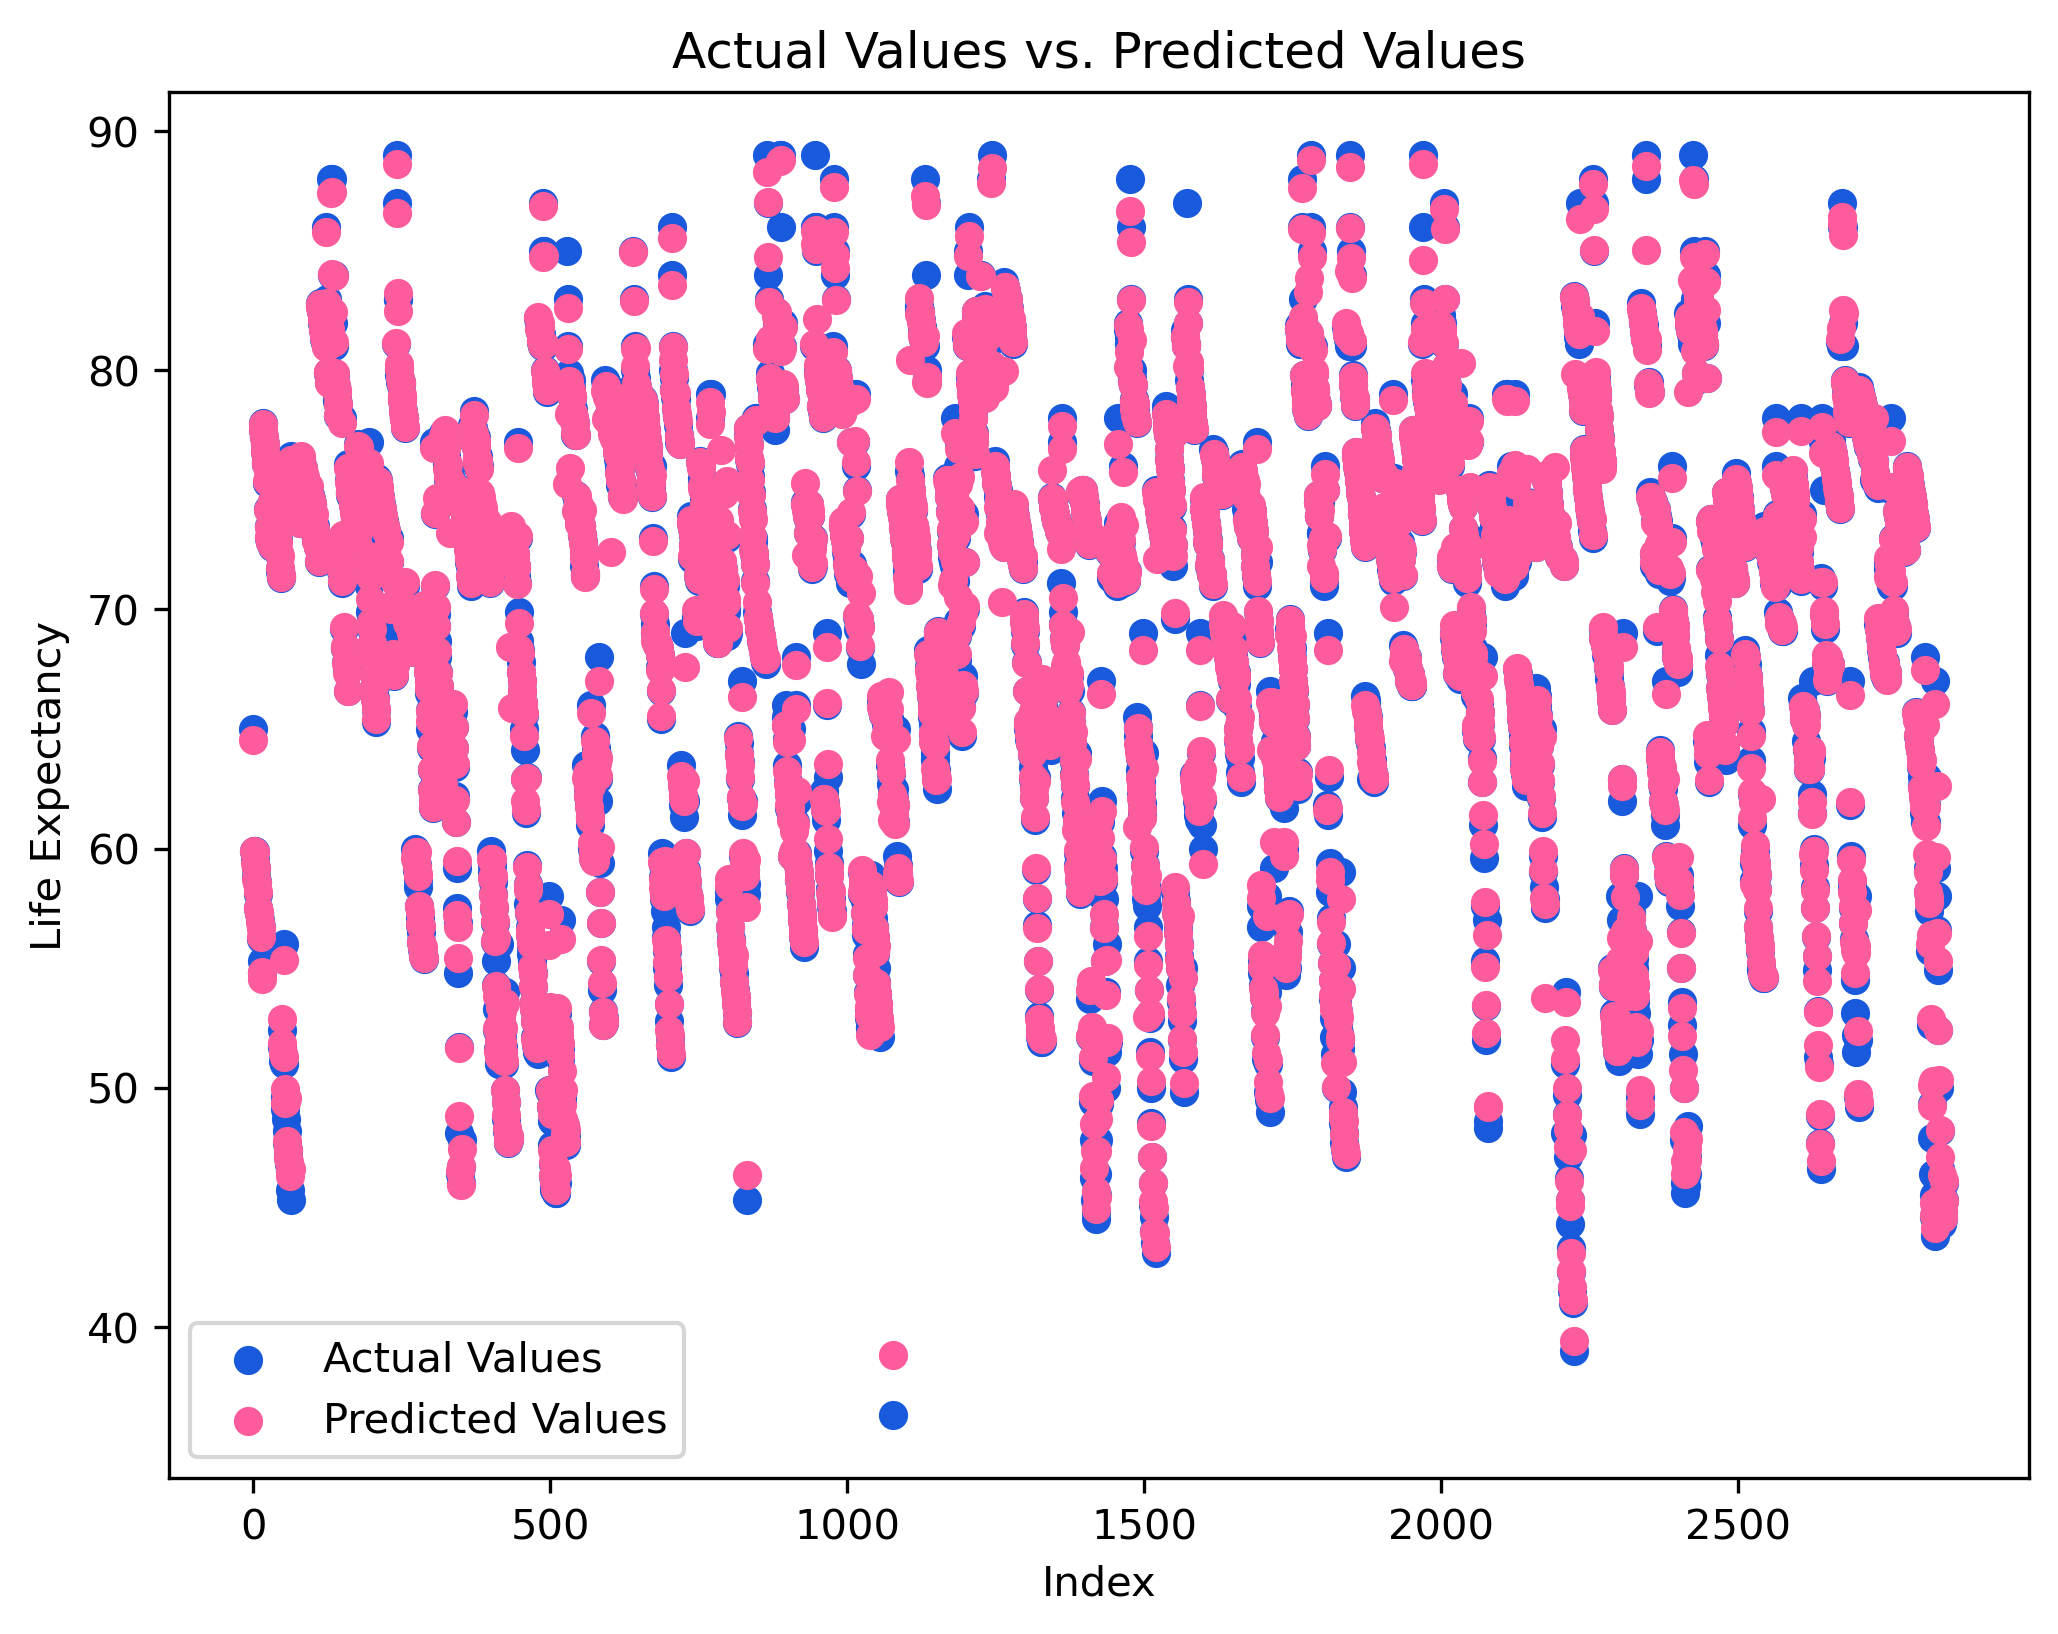

In [ ]:
plt.figure(figsize=(8, 6),dpi=300)
plt.scatter(range(len(y)), y, color='#185ADB', label='Actual Values')
plt.scatter(range(len(y_final)), y_final, color='#FC5C9C', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Life Expectancy')
plt.title('Actual Values vs. Predicted Values')
plt.legend()
plt.show()

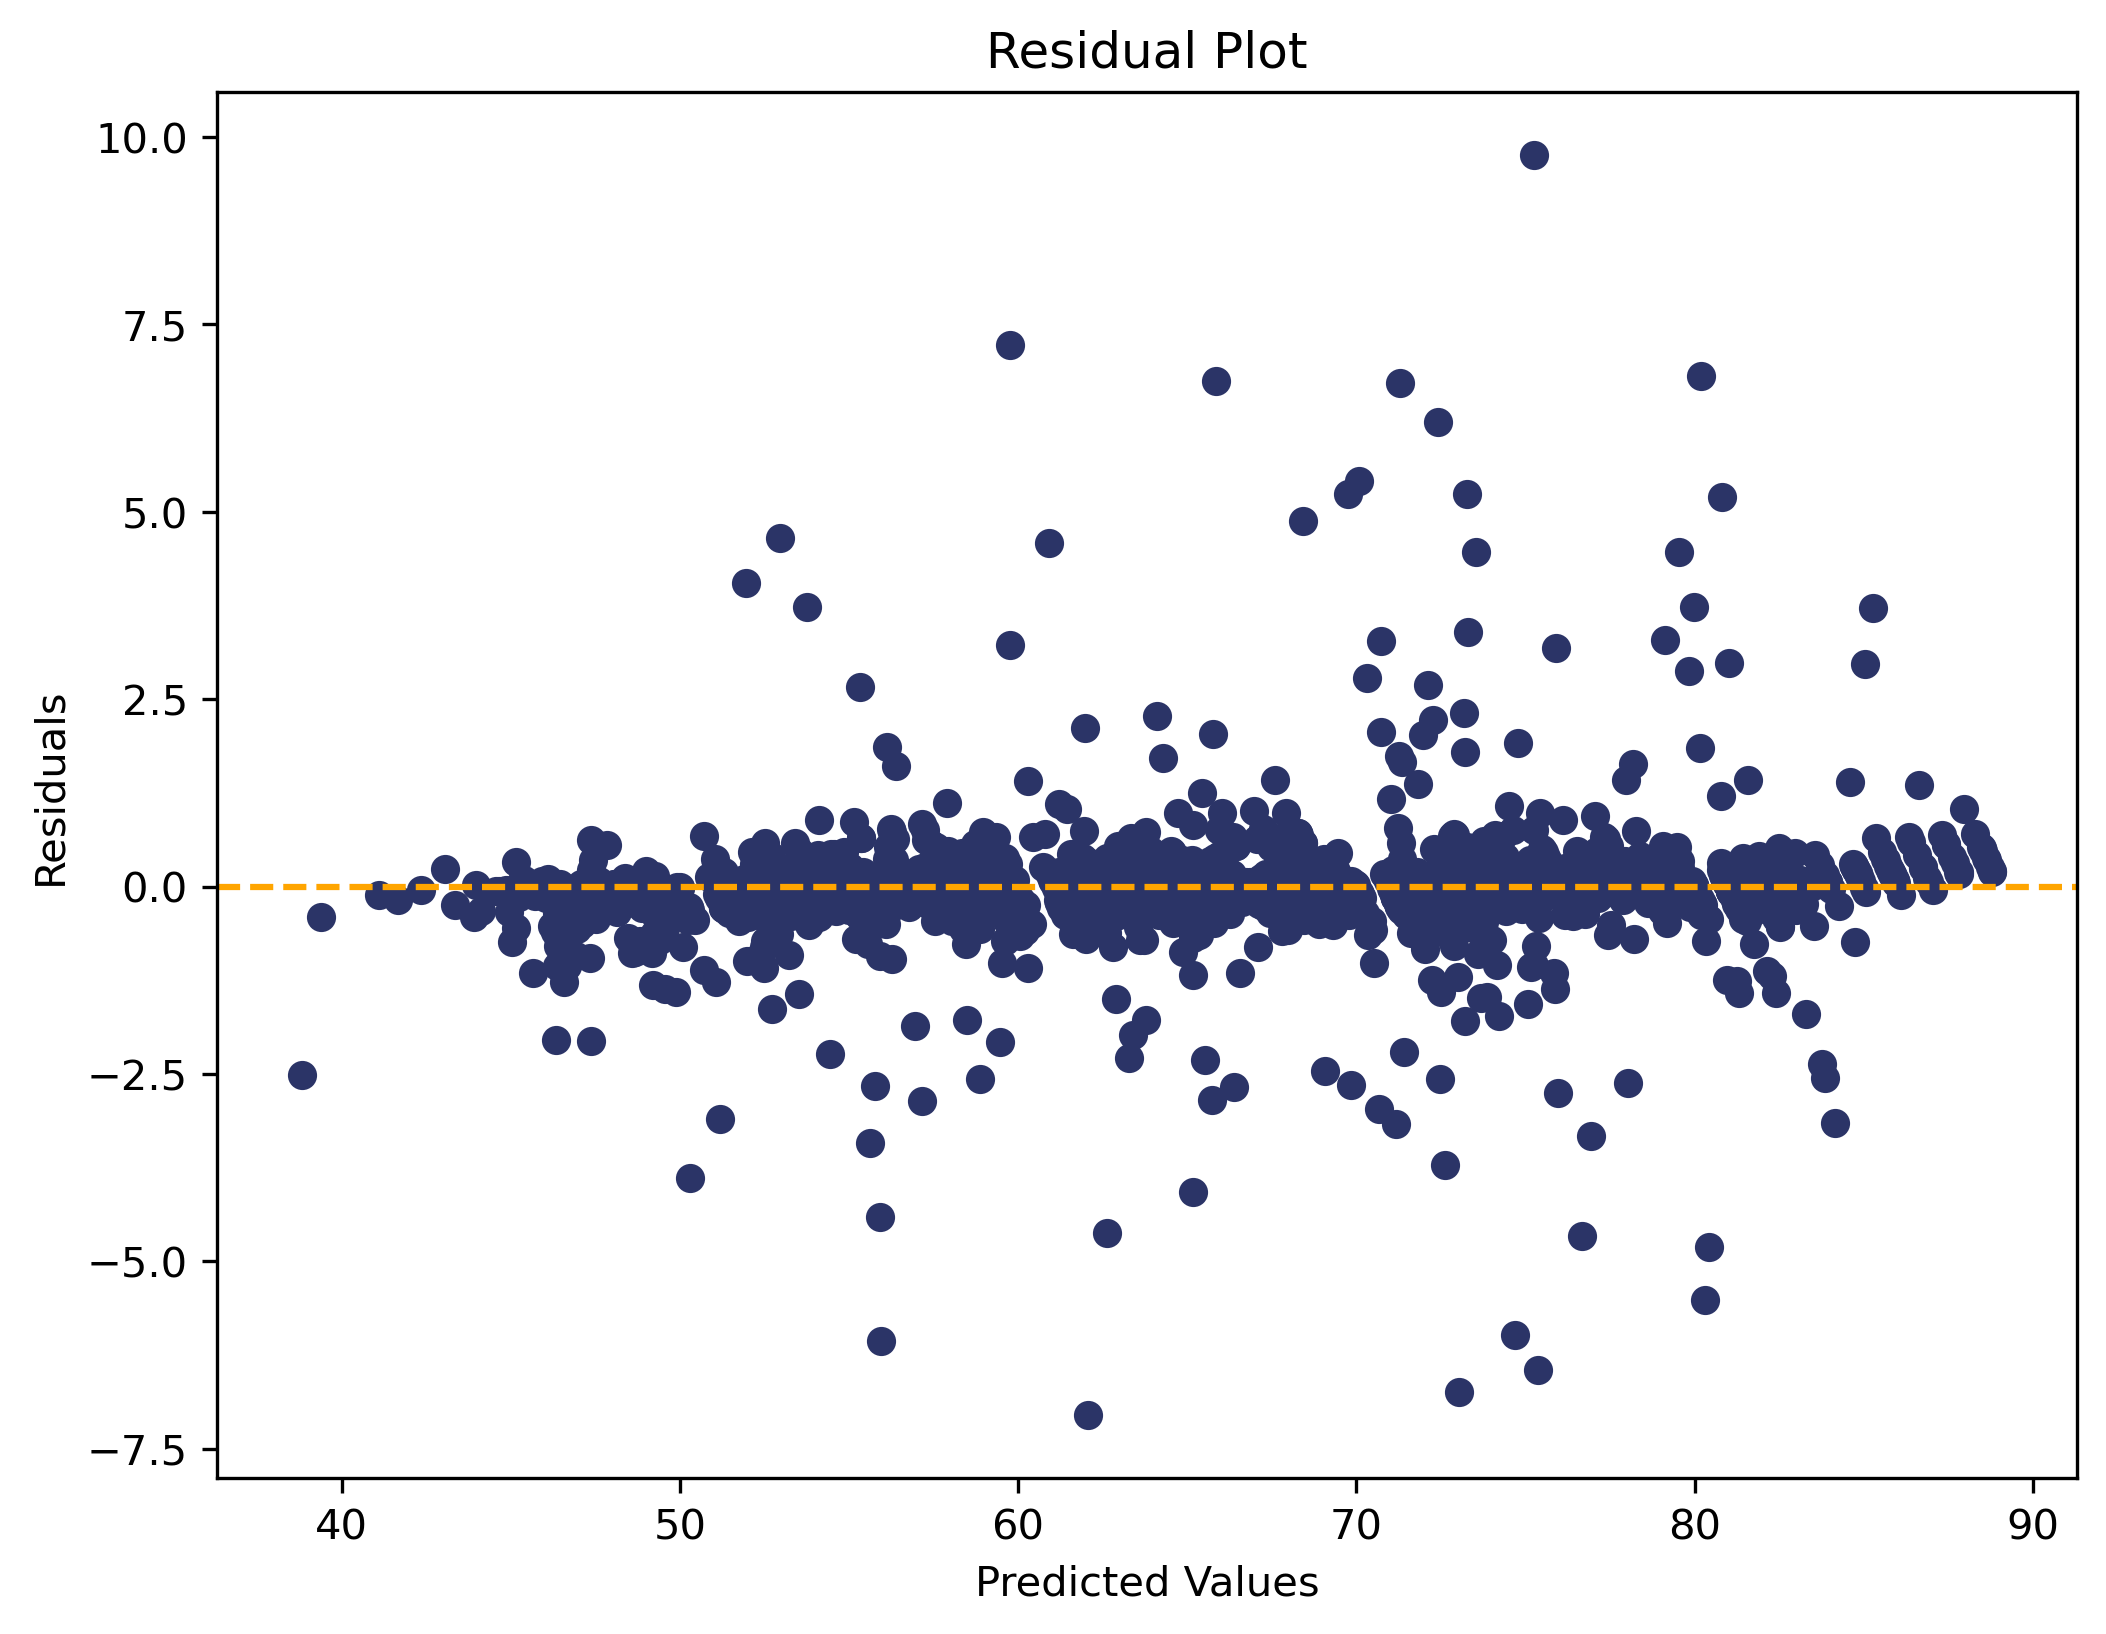

In [ ]:
residuals = y - y_final

plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(y_final, residuals, color='#2B3467')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show();

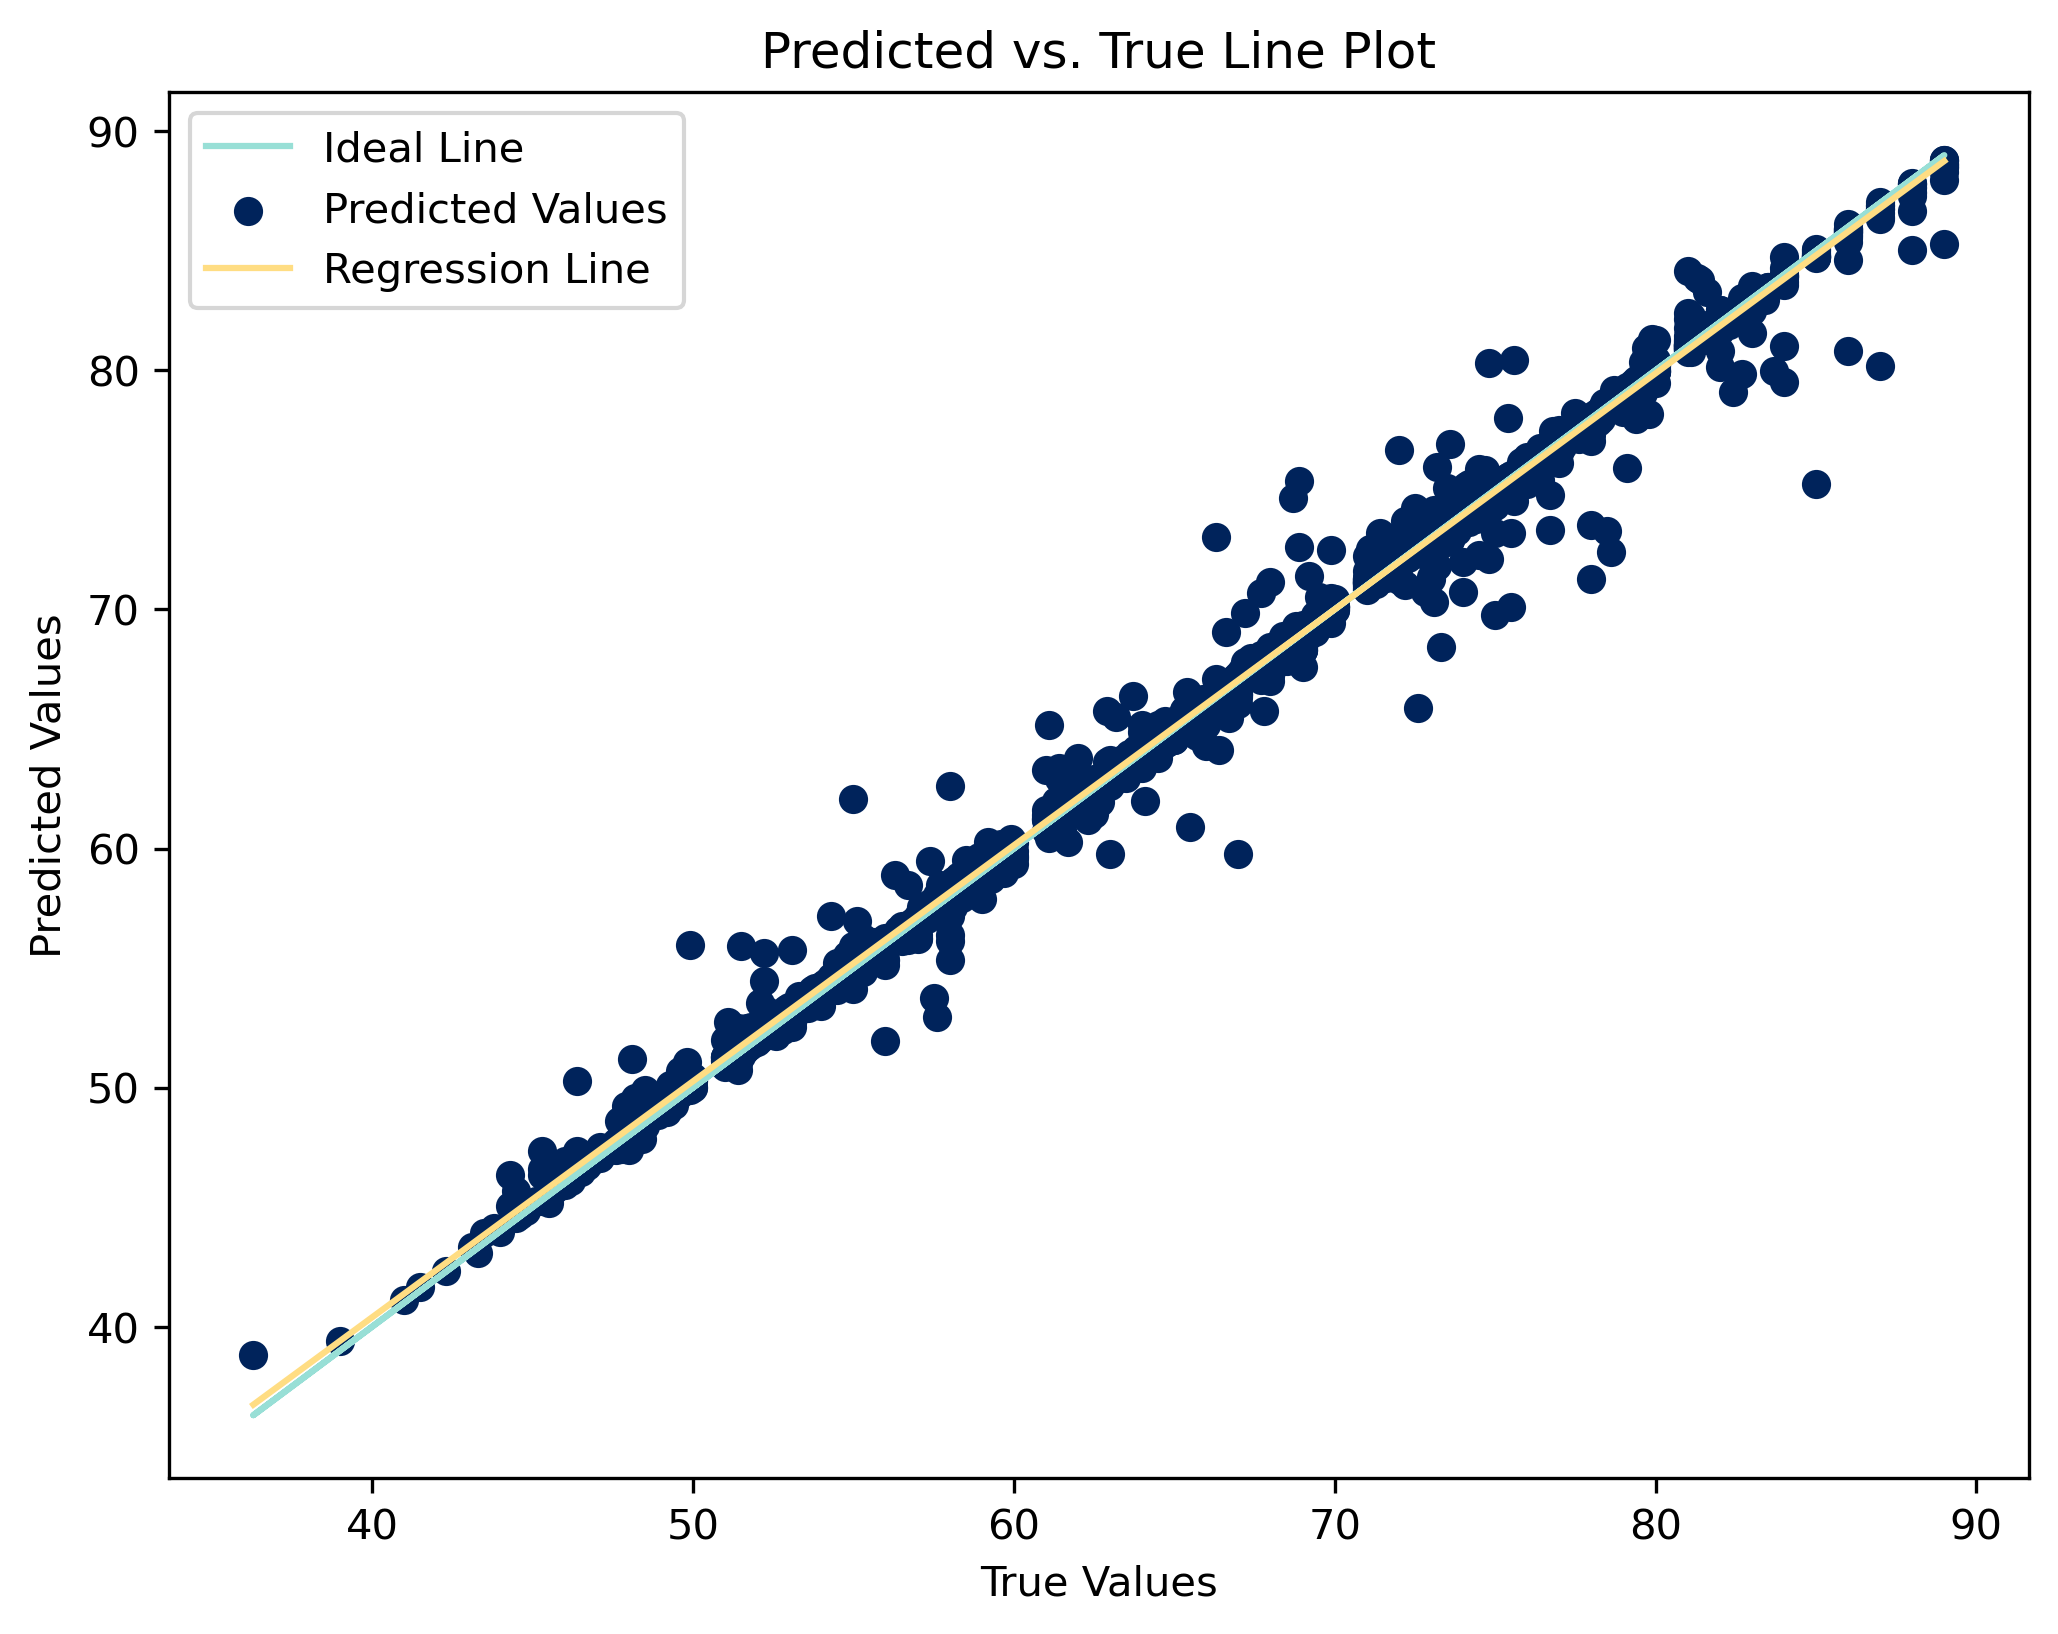

In [ ]:
plt.figure(figsize=(8, 6),dpi=300)
plt.plot(y, y, color='#98DFD6', label='Ideal Line')
plt.scatter(y, y_final, color='#00235B', label='Predicted Values')
plt.plot(np.unique(y), np.poly1d(np.polyfit(y, y_final, 1))(np.unique(y)), color='#FFDD83', label='Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Line Plot')
plt.legend()
plt.show()